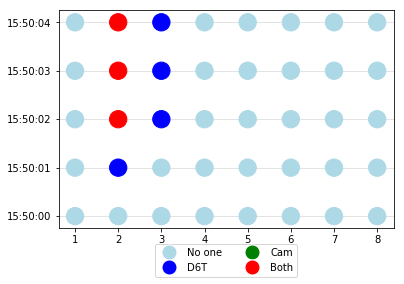

In [11]:
import csv
import datetime

dateLimitLower = '2018-11-28,15:50:00'
dateLimitUpper = '2018-11-28,15:55:00'
max_nr = 30

date_raw = list()
date = list()
data = list()
xlist = list()
ylist = list()
ylabellist = list()
clist = list()


def dateFormat(arg):
    return(datetime.datetime.strptime(arg, '%Y-%m-%d,%H:%M:%S'))

def dateString(arg):
    return(arg.strftime('%H:%M:%S'))

dlLower = dateFormat(dateLimitLower)
dlUpper = dateFormat(dateLimitUpper)

pathLog = 'C:\\Users\\Tiago Cabral\\Desktop\\log.csv'
with open(pathLog,'r') as csvfile:
    plots=csv.reader(csvfile, delimiter=',')
    for row in plots:
        date_raw.append(row[0] + ',' + row[1])
        rowDate = dateFormat(row[0] + ',' + row[1])        
        date.append(rowDate)
        if (rowDate > dlUpper):
            break
        elif  (rowDate < dlLower):
            continue
        line = list()
        for x in range(8):
            line.append(int(row[x+2]))
        data.append(line)

colourlist = {0: "lightblue",
              1: "blue",
              2: "green",
              3: "red"
             }

ylabellist.append('')

for x in range(len(data)):
    ylabellist.append(dateString(date[x]))
    for y in range(8):
        xlist.append(y+1)
        ylist.append(x)
        clist.append(colourlist[data[x][y]])


%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

fig, ax = plt.subplots()

plt.scatter(xlist, ylist,s=300, c=clist)
loc = plticker.MultipleLocator(base=1.0)
ax.yaxis.set_major_locator(loc)
ax.set_yticklabels(ylabellist)
ax.yaxis.grid(color="gainsboro")
ax.set_axisbelow(True)


legend_elements = [Line2D([0], [0], marker='o', color='w', label='No one',
                          markerfacecolor='lightblue', markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='D6T',
                          markerfacecolor='blue', markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='Cam',
                          markerfacecolor='green', markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='Both',
                          markerfacecolor='red', markersize=15)]

ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)

plt.show()

